Customer Order data is provided for analysis which includes the features such as time since last order , quantity of order , price and whether the customer placed an order or no . We need to model the order purchase accept/reject based on the given features and any derived features.  
Once the model is selected , we need to optimise the profit function to arrive at that value of price for the customer that gives the maximum profit.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn import metrics

In [4]:
import statsmodels.formula.api as smf

In [5]:
from scipy.optimize  import minimize

In [6]:
bid_data = pd.read_csv("RawShort1.csv")

In [7]:
bid_data.head()

,Customer,Order,Time,Quantity,PricePerLb,CostPerLb,LagPrice
0,1,0,9.000000,3.5000,2.125714,1.585,2.200000
1,1,0,0.071429,1.1502,3.247261,1.780,2.125714
2,1,0,6.285714,0.2050,2.400000,1.534,3.208138
3,1,0,10.000000,1.0250,2.100000,1.750,2.050000
4,1,1,0.285714,0.2320,2.603448,1.920,2.100000


In [8]:
bid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15887 entries, 0 to 15886
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Customer    15887 non-null  int64  
 1   Order       15887 non-null  int64  
 2   Time        15887 non-null  float64
 3   Quantity    15887 non-null  float64
 4   PricePerLb  15887 non-null  float64
 5   CostPerLb   15887 non-null  float64
 6   LagPrice    15887 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 868.9 KB


In [9]:
## summary statistics
bid_data.describe()

,Customer,Order,Time,Quantity,PricePerLb,CostPerLb,LagPrice
count,15887.000000,15887.000000,15887.000000,15887.000000,15887.000000,15887.000000,15887.000000
mean,921.872726,0.412224,4.451344,0.644774,3.148520,1.961754,3.164525
std,527.451053,0.492251,7.544951,1.296180,1.191687,0.514175,1.206831
min,1.000000,0.000000,0.071429,0.000690,0.289000,0.209379,0.289000
25%,435.000000,0.000000,0.428571,0.094940,2.377093,1.700769,2.383141
50%,992.000000,0.000000,1.714286,0.233450,2.754098,1.809446,2.777778
75%,1375.000000,1.000000,5.000000,0.622000,3.502243,2.030000,3.521225
max,1818.000000,1.000000,97.285714,14.658040,10.000000,7.770000,10.000000


In [14]:
## training  data is for first 1800 customers
train_data = bid_data.copy()
train_data = train_data[train_data['Customer'] <1800]
##
test_data = bid_data.copy()
test_data = test_data[test_data['Customer']  >= 1800]
##

In [15]:
train_data['Order'].value_counts()

0    9160
1    6418
Name: Order, dtype: int64

In [16]:
test_data['Order'].value_counts()

0    178
1    131
Name: Order, dtype: int64

Text(0.5, 1.0, 'Time')

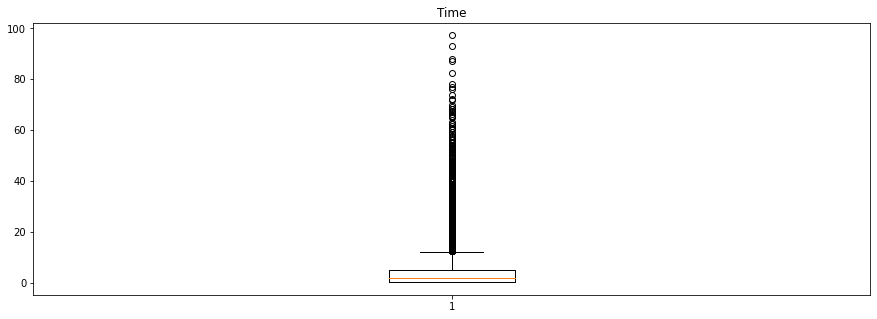

In [17]:
plt.figure(figsize = (15,5))
plt.boxplot(train_data['Time'])
plt.title("Time")


Text(0.5, 1.0, 'Quantity')

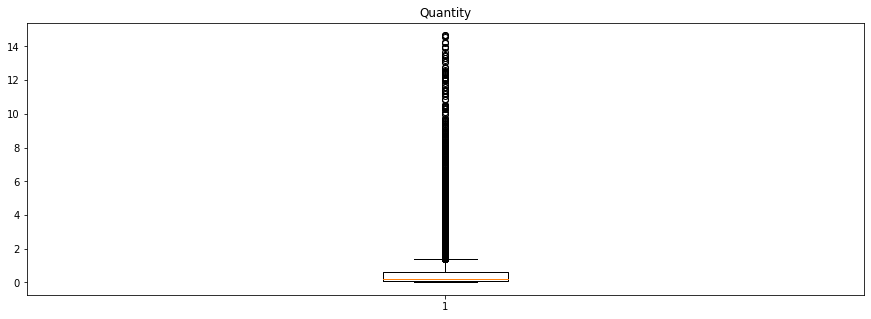

In [18]:
plt.figure(figsize = (15,5))
plt.boxplot(train_data['Quantity'])
plt.title("Quantity")

Text(0.5, 1.0, 'Price')

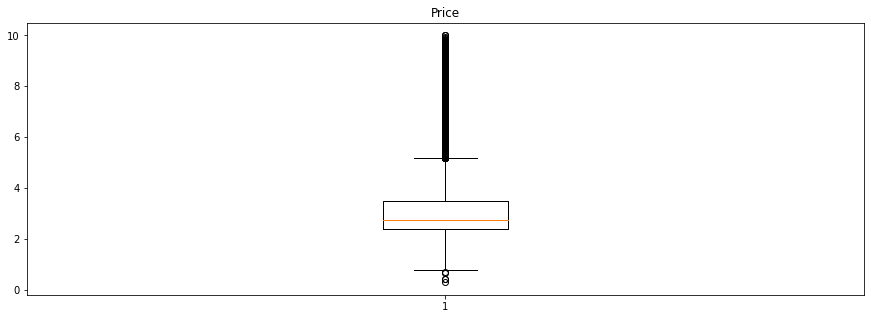

In [19]:
plt.figure(figsize = (15,5))
plt.boxplot(train_data['PricePerLb'])
plt.title("Price")

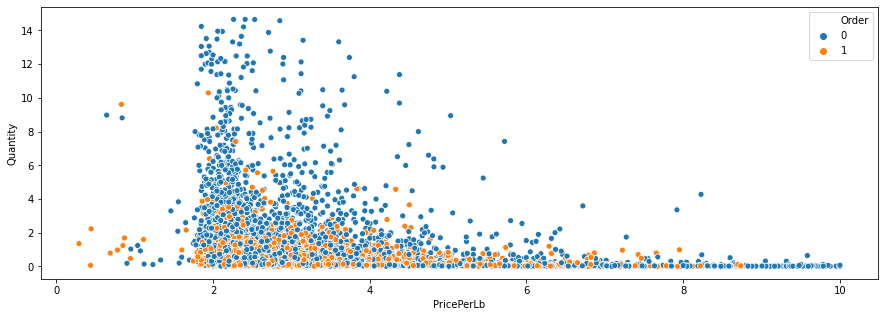

In [20]:
plt.figure(figsize = (15,5))
sns.scatterplot('PricePerLb', 'Quantity', data = train_data , hue = 'Order')

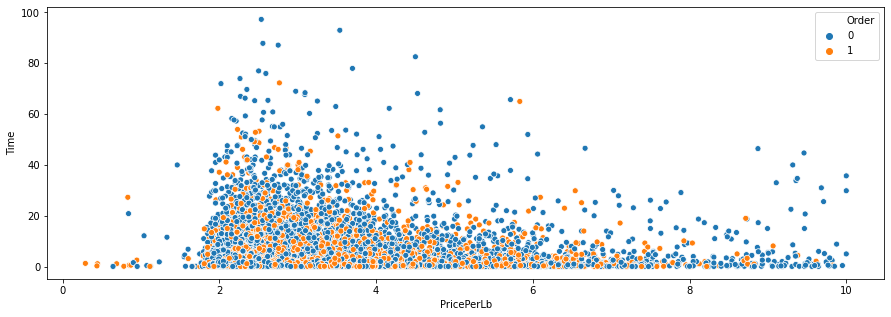

In [21]:
plt.figure(figsize = (15,5))
sns.scatterplot('PricePerLb', 'Time', data = train_data , hue = 'Order')

In [22]:
## modelling  Order placed or no with the independent features -price, quantity and time.
m1 = smf.logit(
  formula='Order ~ Time + Quantity + PricePerLb',
  data=train_data) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.651828
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Order   No. Observations:                15578
Model:                          Logit   Df Residuals:                    15574
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Dec 2020   Pseudo R-squ.:                 0.03800
Time:                        19:32:49   Log-Likelihood:                -10154.
converged:                       True   LL-Null:                       -10555.
Covariance Type:            nonrobust   LLR p-value:                1.452e-173
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6418      0.056     11.525      0.000       0.533       0.751
Time          -0.0309      0.003    -11.877      0.000      -0.036      -0.026
Quantity      -0.4825      0.025    -18.945      0.000      -0.532      -0.433
PricePerLb    -0.1931      0.015    -12.613      0.000      -0.223      -0.163
==============================================================================
"""

In [23]:
## train data prediction
train_prob = m1.predict()
##
train_pred = [1 if i > 0.5 else 0 for i in train_prob]
confusion_matrix(train_data['Order'], train_pred)

array([[7961, 1199],
       [5146, 1272]])

In [24]:
## test data prediction
test_prob = m1.predict(test_data)
##
test_pred = [1 if i > 0.5 else 0 for i in test_prob]
confusion_matrix(test_data['Order'], test_pred)

array([[148,  30],
       [ 85,  46]])

Text(0.5, 0, 'False Positive Rate')

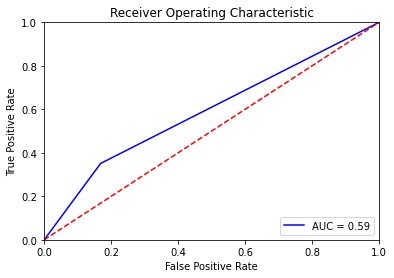

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(test_data['Order'], test_pred)
roc_auc =  metrics.auc(fpr, tpr)
##
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [29]:
## Objective to  maximise profit by selecting the value of price , given the function for order placed. 
p = 2
## select the first customer
features = bid_data.copy()
features = features[['Time','Quantity','PricePerLb','CostPerLb']][:1]
features['PricePerLb'] = p
prob_pred = m1.predict(features)


def calc_profit(p):
    
    time = features['Time'].values
    qty = features['Quantity'].values
    x = np.exp(m1.params[0] + m1.params[1]*time + m1.params[2]*qty + m1.params[3]*p)
    ## probability of order placed 
    prob_purchase = x/(1+x)
    profit = (p - features['CostPerLb'].values)*prob_purchase*qty
    
    return -profit 
    
    

In [27]:
calc_profit(2)

array([-0.22221765])

In [28]:
## bounds for price
bounds = [(0.289,10)] 

In [30]:
## optimise the order function for maximising profit
soln = minimize(calc_profit , 2,  bounds = bounds ,  method = 'SLSQP' , options = {'disp' : True} )

Optimization terminated successfully    (Exit mode 0)
            Current function value: [-1.21996261]
            Iterations: 7
            Function evaluations: 14
            Gradient evaluations: 7


In [31]:
## best value of price
soln.x

array([7.10823721])

In [32]:
## best profit 
-soln.fun

array([1.21996261])

Since the optimised price is higher, rebuild the model for order with new derived features.  
Prospect Theory states that investors value gains and losses differently, placing more weight on perceived gains versus perceived losses.   
Create 'gain' and 'loss' features based on a reference value.  

In [33]:
## create two features , gain and loss depending on a reference price
def set_loss(row):
    if (row['PricePerLb'] > row['LagPrice']):
        return row['PricePerLb'] - row['LagPrice']
    else:
        return 0
    
def set_gain(row):
    if (row['PricePerLb'] < row['LagPrice']):
        return row['LagPrice'] - row['PricePerLb']
    else:
        return 0
    

In [34]:
bid_data['loss'] = bid_data[['PricePerLb','LagPrice']].apply(lambda x: set_loss(x), axis = 1)
bid_data['gain'] = bid_data[['PricePerLb','LagPrice']].apply(lambda x: set_gain(x), axis = 1)
##
train_data = bid_data.copy()
train_data = train_data[train_data['Customer'] <1800]
##
test_data = bid_data.copy()
test_data = test_data[test_data['Customer']  >= 1800]
##

In [35]:
## add these derived features in the model.
m2 = smf.logit(
  formula='Order ~ Time + Quantity + gain +loss ',
  data=train_data) \
.fit()

m2.summary()

Optimization terminated successfully.
         Current function value: 0.645032
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Order   No. Observations:                15578
Model:                          Logit   Df Residuals:                    15573
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Dec 2020   Pseudo R-squ.:                 0.04803
Time:                        19:34:57   Log-Likelihood:                -10048.
converged:                       True   LL-Null:                       -10555.
Covariance Type:            nonrobust   LLR p-value:                3.452e-218
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1142      0.027      4.212      0.000       0.061       0.167
Time          -0.0323      0.003    -12.292      0.000      -0.037      -0.027
Quantity      -0.4771      0.025    -19.124      0.000      -0.526      -0.428
gain           0.1377      0.019      7.251      0.000       0.101       0.175
loss          -0.3407      0.023    -14.577      0.000      -0.387      -0.295
==============================================================================
"""

Predict probability , get the class and look into the accuracy.  

In [36]:
## train data prediction
train_prob = m2.predict()
##
train_pred = [1 if i > 0.5 else 0 for i in train_prob]
confusion_matrix(train_data['Order'], train_pred)

array([[7646, 1514],
       [4655, 1763]])

In [37]:
## test data prediction
test_prob = m2.predict(test_data)
##
test_pred = [1 if i > 0.5 else 0 for i in test_prob]
confusion_matrix(test_data['Order'], test_pred)

array([[136,  42],
       [ 74,  57]])

Text(0.5, 0, 'False Positive Rate')

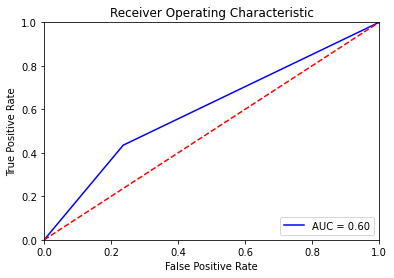

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(test_data['Order'], test_pred)
roc_auc =  metrics.auc(fpr, tpr)
##
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The new model with derived features for gain and loss is slightly better.  

In [39]:
## Objective  - Maximise profit to arrive  at the optimal value of price , given the function that 
## predicts probability of order.  

## select the first record of the first customer
p = 2
features = bid_data.copy()
features = features[['Time','Quantity','PricePerLb','CostPerLb','gain','loss','LagPrice']][:1]

def calc_profit_2(p):
    
    time = features['Time'].values
    qty = features['Quantity'].values
    gain = (features['LagPrice'].values - p  )*(features['LagPrice'].values > p)
    loss = (p - features['LagPrice'].values)*(p > features['LagPrice'].values)
    ## equation for predicting the probability of order 
    x = np.exp(m2.params[0] + time*(m2.params[1]) + qty*(m2.params[2]) + gain*m2.params[3] + loss*m2.params[4])
    prob_purchase = x/(1+x)
    #
    profit = (p - features['CostPerLb'].values)*prob_purchase*qty
    
    
    return -profit 
    

In [40]:
## first customer details
features

,Time,Quantity,PricePerLb,CostPerLb,gain,loss,LagPrice
0,9.0,3.5,2.125714,1.585,0.074286,0.0,2.2


In [41]:
calc_profit_2(2.12574)

array([-0.26018022])

In [42]:
## bounds for price
bounds = [(0.289,10)] 

In [43]:
soln = minimize(calc_profit_2 , 4,  bounds = bounds ,  method = 'SLSQP' , options = {'disp' : True} )

Optimization terminated successfully    (Exit mode 0)
            Current function value: [-0.6875722]
            Iterations: 6
            Function evaluations: 12
            Gradient evaluations: 6


In [44]:
## optimised price
soln.x , 

(array([4.71633893]),)

In [45]:
## maximised  profit.
-soln.fun

array([0.6875722])

In [52]:
## 

def calc_profit_3(p):
    
    time = features['Time']
    qty = features['Quantity']
    gain = (features['LagPrice']- p  )*(features['LagPrice'] > p)
    loss = (p - features['LagPrice'])*(p > features['LagPrice'])
    ## equation for predicting the probability of order 
    x = np.exp(m2.params[0] + time*(m2.params[1]) + qty*(m2.params[2]) + gain*m2.params[3] + loss*m2.params[4])
    prob_purchase = x/(1+x)
    #
    profit = (p - features['CostPerLb'])*prob_purchase*qty
    
    
    return -profit 


In [46]:
## for the first 15 customers , get the range of optimised prices 

all_features = bid_data.copy()
all_features = all_features[(all_features['Order'] ==1) & (all_features['Customer']<=15)]
print(all_features.shape)

(15, 9)


In [48]:
all_features

,Customer,Order,Time,Quantity,PricePerLb,CostPerLb,LagPrice,loss,gain
4,1,1,0.285714,0.23200,2.603448,1.920000,2.100000,0.503448,0.000000
8,2,1,19.428571,0.12640,2.531645,1.699129,2.539923,0.000000,0.008278
17,5,1,5.285714,0.06690,2.959641,1.860000,2.421525,0.538117,0.000000
19,6,1,4.000000,2.10230,3.366789,2.610408,3.810541,0.000000,0.443753
20,6,1,4.285714,0.59200,3.547297,1.410000,3.366789,0.180509,0.000000
21,6,1,9.285714,1.99250,2.100376,1.710950,3.547297,0.000000,1.446921
23,8,1,5.142857,0.08985,3.138564,1.674140,3.248227,0.000000,0.109663
27,8,1,1.428571,0.00850,5.882353,1.812250,3.177005,2.705348,0.000000
33,9,1,3.857143,0.16800,3.250000,1.930000,2.465278,0.784722,0.000000
34,9,1,5.714286,0.58946,2.588250,1.978622,3.250000,0.000000,0.661750


In [58]:
## Run the optimisation for each customer and get the best price and profit
price_list = []
profit_list = []
for i in all_features.index:
    features = all_features.loc[i]
    soln = minimize(calc_profit_3 , 4,  bounds = bounds ,  method = 'SLSQP' , options = {'disp' : True} )
    price_list.append(soln.x[0])
    profit_list.append(-soln.fun[0])

Optimization terminated successfully    (Exit mode 0)
            Current function value: [-0.19800271]
            Iterations: 7
            Function evaluations: 14
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: [-0.08204568]
            Iterations: 7
            Function evaluations: 14
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: [-0.0592102]
            Iterations: 7
            Function evaluations: 14
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: [-1.04242812]
            Iterations: 6
            Function evaluations: 12
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: [-0.63548687]
            Iterations: 6
            Function evaluations: 12
            Gradient e

Text(0.5, 1.0, 'Optimised price for 15 customers')

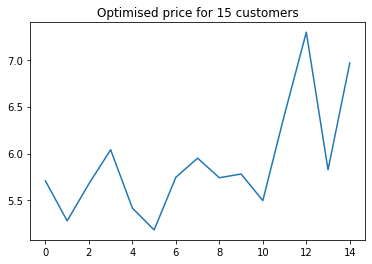

In [64]:
plt.plot(price_list)
plt.title("Optimised price for 15 customers")

Text(0.5, 1.0, 'Max profit for 15 customers')

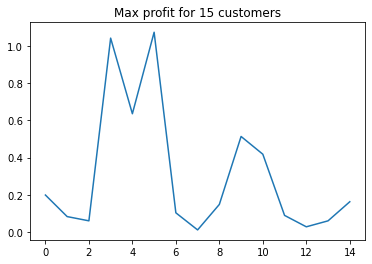

In [65]:
plt.plot(profit_list)
plt.title("Max profit for 15 customers")